## Example using IRIS dataset

In [1]:

import pandas as pd

from scivae import VAE, Validate
from sciviso import Scatterplot

# Set the location of the mnist data
data_dir = '../tests/data/'
config = {'scale': False, # Whether to min max scale your data VAEs work best when data is pre-normalised & outliers removed for trainiing
           'batch_norm': True, 
          'loss': {'loss_type': 'mse', # mean squared error
           'distance_metric': 'mmd', # Maximum mean discrepency (can use kl but it works worse)
            'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 32, 'activation_fn': 'selu'}, # First layer of encoding
                                  {'num_nodes': 16, 'activation_fn': 'selu'}]}, # Second layer of encoding
          'decoding': {'layers': [{'num_nodes': 16, 'activation_fn': 'selu'},  # First layer of decoding
                                  {'num_nodes': 32, 'activation_fn': 'selu'}]}, # Second layer of decoding 
 'latent': {'num_nodes': 2}, 'optimiser': {'params': {}, 'name': 'adagrad'}} # Empty params means use default

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


2024-07-30 16:24:33.593887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 16:24:33.696695: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 16:24:33.701761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-30 16:24:33.701773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart d

None
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           160         ['default_input[0][0]']          
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                               

2024-07-30 16:24:35.484936: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-30 16:24:35.485024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-07-30 16:24:35.485079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-07-30 16:24:35.485130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2024-07-30 16:24:35.523428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

None
Epoch 1/50
3/3 [==============================] - 2s 170ms/step - loss: 65.8545 - val_loss: 46.0099
Epoch 2/50
3/3 [==============================] - 0s 49ms/step - loss: 62.0764 - val_loss: 44.4517
Epoch 3/50
3/3 [==============================] - 0s 52ms/step - loss: 60.6233 - val_loss: 43.4814
Epoch 4/50
3/3 [==============================] - 0s 38ms/step - loss: 61.5485 - val_loss: 42.6526
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 60.3449 - val_loss: 42.8504
Epoch 6/50
3/3 [==============================] - 0s 53ms/step - loss: 60.3724 - val_loss: 42.7094
Epoch 7/50
3/3 [==============================] - 0s 54ms/step - loss: 60.1176 - val_loss: 42.9559
Epoch 8/50
3/3 [==============================] - 0s 39ms/step - loss: 59.5652 - val_loss: 43.0473
Epoch 9/50
3/3 [==============================] - 0s 39ms/step - loss: 59.7125 - val_loss: 43.1015
Epoch 10/50
3/3 [==============================] - 0s 37ms/step - loss: 60.6814 - val_loss: 43.4569
Epo

## Visualise the latent space

Visualise and colour the latent space.


/Users/ariane/opt/miniconda3/envs/test_scivae_2022/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


<AxesSubplot: title={'center': 'Latent space coloured by class'}, xlabel='VAE 0', ylabel='VAE 1'>

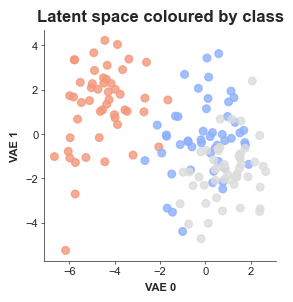

In [ ]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class',
                      xlabel='VAE 0', ylabel='VAE 1')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [ ]:
vd = Validate(encoding, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.782608695652174
0.9166666666666666
